In [2304]:
import numpy as np
import sympy as sym
from sympy import oo
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2305]:
α, γ, k, μ, C, I = sym.symbols('α, γ, k, μ, C, I')

dCdt = α*C - (k*C*I) + γ*I
dIdt = (k*C*I) - γ*I - μ*I

In [2306]:
dCdt

-C*I*k + C*α + I*γ

In [2307]:
dIdt

C*I*k - I*γ - I*μ

In [2308]:
eqs = sym.solve([dCdt, dIdt], [C, I])
eqs

[(0, 0), ((γ + μ)/k, α*(γ + μ)/(k*μ))]

In [2309]:
eqs[1][0]

(γ + μ)/k

In [2310]:
eqs[1][1]

α*(γ + μ)/(k*μ)

In [2311]:
Meq=sym.Matrix([dCdt,dIdt])
Meq

Matrix([
[-C*I*k + C*α + I*γ],
[ C*I*k - I*γ - I*μ]])

In [2312]:
Mvar=sym.Matrix([C, I])
Mvar

Matrix([
[C],
[I]])

In [2313]:
Jac=Meq.jacobian(Mvar)
Jac

Matrix([
[-I*k + α,    -C*k + γ],
[     I*k, C*k - γ - μ]])

In [2314]:
eqs

[(0, 0), ((γ + μ)/k, α*(γ + μ)/(k*μ))]

In [2315]:
inx_eq = 0
Ceq=sym.simplify(eqs[inx_eq][0]) #SELECCIONAMOS, SOLS TIENE EN LA PRIMERA DIMENSION EL NUMERO DEL EQUILIBRIO, Y LA SEGUNDA ES PARA X Y PARA Y. 
Ieq=sym.simplify(eqs[inx_eq][1])
print(f"C eq = {Ceq}")
print(f"I eq = {Ieq}")

Jaceq = Jac.subs(C,Ceq).subs(I,Ieq)
eig = Jaceq.eigenvals()
Eig = list(eig.keys())
Eig1 = Eig[0]
Eig2 = Eig[1]
print(f"Valor propio 1 = {sym.simplify(Eig1)}")
print(f"Valor propio 2 = {sym.simplify(Eig2)}")

C eq = 0
I eq = 0
Valor propio 1 = -γ - μ
Valor propio 2 = α


In [2316]:
# Parámetros

α = 2 # 1/hora *
γ = 1 # 1/hora (0.81 - 2) ; (Oscila con valores < 0.8) -> 560 = Caos; 565 rango máximo
k = 0.00001 # 1/hora 
μ = 0.5 # 1/hora *
C0 = 100 # Cancer Inicial
I0 = 1  # Cancer + Virus Inicial

dt = 0.01
tmax = 30
steps = int(tmax/dt)

def model(z, t):
    C, I  = z
    dCdt = α*C - (k*C*I) + γ*I
    dIdt = (k*C*I) - γ*I - μ*I
    return np.array([dCdt, dIdt])

t = np.linspace(0,tmax, steps)
c0 = np.array([C0, I0])

sol = odeint(model,c0,t)  # Solución del sistema
solC = sol[:,0]
solI = sol[:,1]

print('Equilibrio de Coexistencia')
print(f"Valor propio 1 = {(-α*γ - np.sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)}")
print(f"Valor propio 2 = {(-α*γ + np.sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)}")

Equilibrio de Coexistencia
Valor propio 1 = -3.0
Valor propio 2 = -1.0


In [2317]:
# C
(γ + μ)/k

150000.0

In [2318]:
# I
α*(γ + μ)/(k*μ)

600000.0

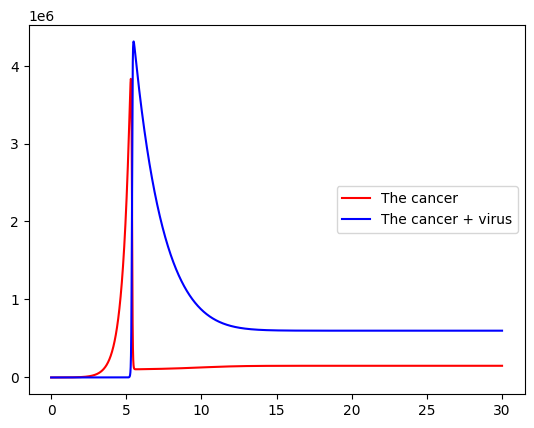

In [2319]:
plt.plot(t, solC, color='red', label='The cancer')
plt.plot(t, solI, color='blue', label='The cancer + virus')
plt.legend(loc=5)
# plt.yscale('log')
# plt.xlim(400, 500)
# plt.ylim(0, 0.5*1*10**6)

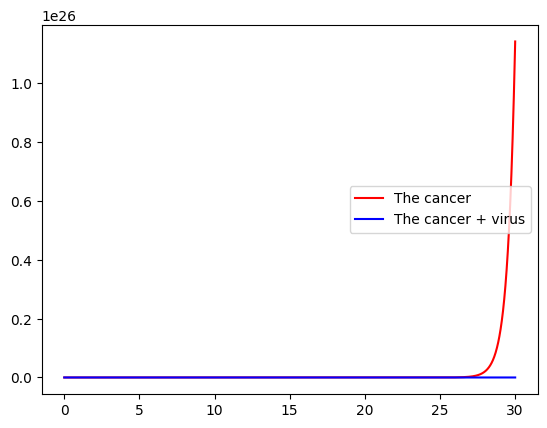

In [2320]:
# Parámetros

α = 2 # 1/hora *
γ = 1 # 1/hora (0.81 - 2) ; (Oscila con valores < 0.8) -> 560 = Caos; 565 rango máximo
k = 0.00001 # 1/hora 
μ = 0.5 # 1/hora *
C0 = 1 # Cancer Inicial
I0 = 100  # Cancer + Virus Inicial

dt = 0.01
tmax = 30
steps = int(tmax/dt)

def model(z, t):
    C, I  = z
    dCdt = α*C - ((k*C*I)/(I + C))
    dIdt = ((k*C*I)/ (I + C)) - μ*I
    return np.array([dCdt, dIdt])

t = np.linspace(0,tmax, steps)
c0 = np.array([C0, I0])

sol = odeint(model,c0,t)  # Solución del sistema
solC = sol[:,0]
solI = sol[:,1]
plt.plot(t, solC, color='red', label='The cancer')
plt.plot(t, solI, color='blue', label='The cancer + virus')
plt.legend(loc=5)